Importar librerías

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
%matplotlib inline


Cargar datos en dataframe

In [87]:
df_clientes = pd.read_csv("datos.csv")
df_clientes.head()


,cliente_id,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,clientecat
0,1,2,13,44,1,9,64000,4,5,0,0,2,1
1,2,3,11,33,1,7,136000,5,5,0,0,6,4
2,3,3,68,52,1,24,116000,1,29,0,1,2,3
3,4,2,33,33,0,12,33000,2,0,0,1,1,1
4,5,2,23,30,1,9,30000,1,2,0,0,4,3



Agrupar clientes
1- Servicio Básico 2- Servicio enlinea 3- Servicio Premium y 4- Servicio Completo



In [88]:
df_ciente_01 = df_clientes.drop(['cliente_id','region','tenure','marital', 'address','ed','employ','retire','gender','reside','clientecat'], axis=1)
df_ciente_01.head()

,age,income
0,44,64000
1,33,136000
2,52,116000
3,33,33000
4,30,30000



Instrucciones para graficar los clusters 


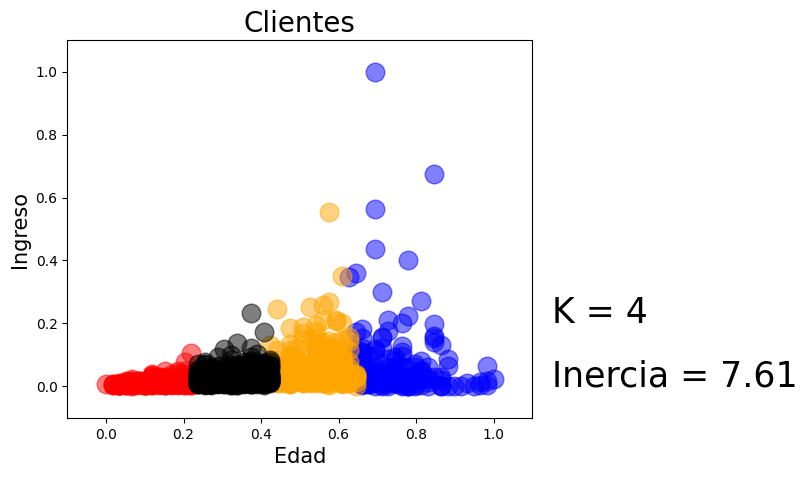

In [91]:
escalador =  MinMaxScaler().fit(df_ciente_01.values)

df_ciente_01 = pd.DataFrame(escalador.transform(df_ciente_01.values),columns=["age", "income"])

kmeans = KMeans(n_clusters=4).fit(df_ciente_01.values)

df_ciente_01["cluster"] = kmeans.labels_

plt.figure(figsize=(6, 5), dpi=100)

colores = ["red", "blue", "orange", "black", "purple", "pink", "brown"]


for cluster in range(kmeans.n_clusters):
    plt.scatter(df_ciente_01[df_ciente_01["cluster"] == cluster]["age"],
                df_ciente_01[df_ciente_01["cluster"] == cluster]["income"],
                marker="o", s=180, color=colores[cluster], alpha=0.5)
    
    plt.scatter(kmeans.cluster_centers_[cluster][0], 
                kmeans.cluster_centers_[cluster][1], 
                marker="*", s=280, color=colores[cluster])

plt.title("Clientes", fontsize=20)
plt.xlabel("Edad", fontsize=15)
plt.ylabel("Ingreso", fontsize=15)
plt.text(1.15, 0.2, "K = %i" % kmeans.n_clusters, fontsize=25)
plt.text(1.15, 0, "Inercia = %0.2f" % kmeans.inertia_, fontsize=25)
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)    
plt.show()

del df_ciente_01["cluster"] 
